### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [200]:
data = pd.read_csv('data/coupons.csv')

In [201]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [121]:
data.shape[0]

12684

2. Investigate the dataset for missing or problematic data.

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

**Inference**
Car has a significant number of missing values (12,576), which might impact analysis if not handled properly.
Other columns like Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50 have relatively few missing values, which might be easier to handle through imputation or exclusion.
The majority of the dataset is complete, which is beneficial for most analyses.

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
#12576 out of 12684 are null  Lets find all the unique values in column 'car' to understand better
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [178]:
# That data does not make much sense hence drop the column 
data.drop(columns=['car'], inplace=True)

In [9]:
data.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [10]:
# Lets find the 'total' null value count in df

data.isnull().sum().sum()

794

In [179]:
# Drop null values 
data = data.dropna()

In [11]:

data.isnull().sum().sum()

0

**Inference**
Dropped Column:

The car column was dropped due to its high number of missing values (12,576), making it impractical for analysis.
Handling Missing Values:
Remaining rows with missing values (totaling 794 missing values across various columns) were removed using data.dropna(). This ensures that the dataset no longer has any missing values.

**Current State**
The dataset is now free of missing values, which simplifies further analysis and modeling.
The integrity of the dataset is maintained, with all remaining columns complete and ready for use.


4. What proportion of the total observations chose to accept the coupon? 



In [83]:
# Lets first calculate the coupon accepted count
coupon_accepted_count = data['Y'].value_counts()[1]
# Lets calculate the total coupon offered count
total_coupon_offered_count = data['Y'].count()

# Lets calculate the proportion of coupon acceptance from above values
coupon_acceptance_percentage = round((coupon_accepted_count/total_coupon_offered_count)*100,2)

coupon_acceptance_percentage

56.93

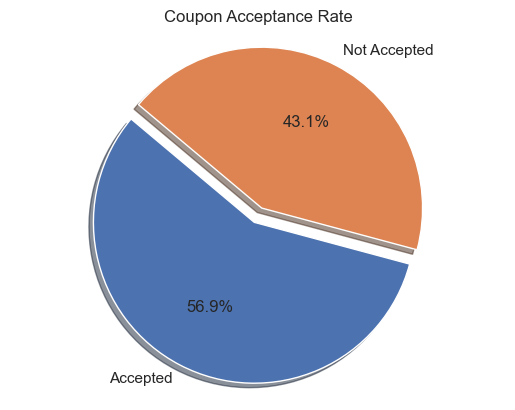

In [233]:

# Calculate the counts for accepted and not accepted
coupon_not_accepted_count = total_coupon_offered_count - coupon_accepted_count

# Calculate the percentages
coupon_acceptance_percentage = (coupon_accepted_count / total_coupon_offered_count) * 100
coupon_not_accepted_percentage = (coupon_not_accepted_count / total_coupon_offered_count) * 100

# Data to plot
labels = 'Accepted', 'Not Accepted'
sizes = [coupon_acceptance_percentage, coupon_not_accepted_percentage]

explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Coupon Acceptance Rate')
plt.show()


**Inference**
Acceptance rate of approximately 56.93%, it suggests that a considerable portion of the total observations chose to accept the coupon

5. Use a bar plot to visualize the `coupon` column.

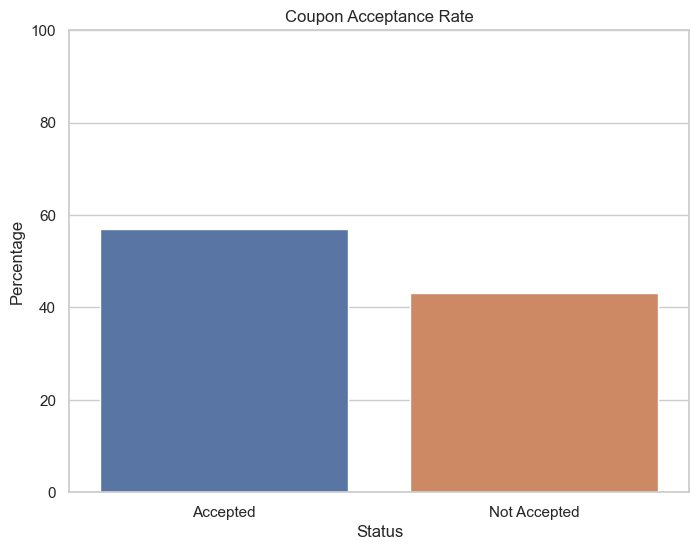

In [85]:

# Calculate the count of not accepted coupons
coupon_not_accepted_count = total_coupon_offered_count - coupon_accepted_count

# Data preparation
data_coupon_acceptance = {
    'Status': ['Accepted', 'Not Accepted'],
    'Count': [coupon_accepted_count, coupon_not_accepted_count],
    'Percentage': [
        (coupon_accepted_count / total_coupon_offered_count) * 100,
        (coupon_not_accepted_count / total_coupon_offered_count) * 100
    ]
}


df = pd.DataFrame(data_coupon_acceptance)

# Plotting with Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

barplot_acceptance = sns.barplot(x='Status', y='Percentage', data=df)

plt.title('Coupon Acceptance Rate')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Ensuring the y-axis goes from 0 to 100 for better readability
plt.show()


Text(0.5, 1.0, 'Coupon Type by Count')

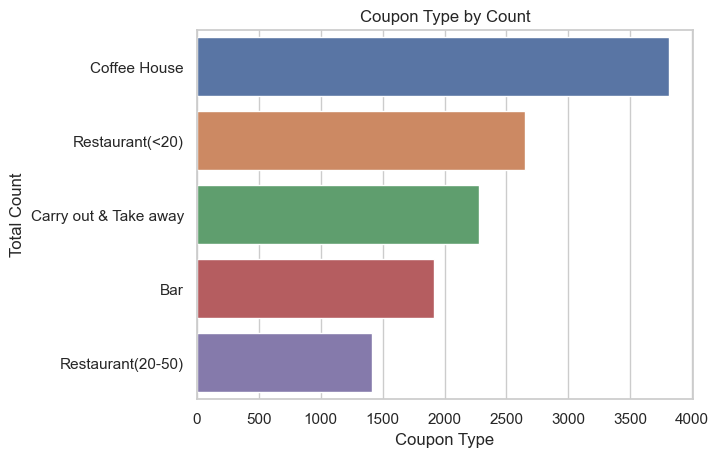

In [86]:
# Calculate the coupon accepted count
coupon_accepted_count = data['Y'].value_counts()[1]
# Coupon offered count
total_coupon_offered_count = data['Y'].count()

# Proportion of coupon acceptance from above values
coupon_acceptance_percentage = round((coupon_accepted_count/total_coupon_offered_count)*100,2)

coupon_acceptance_percentage

g1 = sns.barplot(y=data.coupon.value_counts().index, x=data.coupon.value_counts())
g1.set(xlabel='Coupon Type', ylabel='Total Count')
g1.set_title('Coupon Type by Count')

**Inference**
Higher coupon redemption rates for coffee shops and restaurants with lower price ranges compared to bars or expensive restaurants suggest that customers may be more incentivized by discounts or offers in everyday or affordable dining settings than in higher-end or specialized establishments.

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Temperature Histogram')

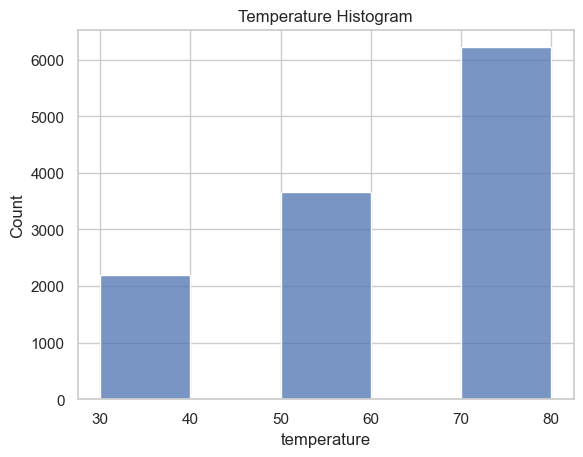

In [87]:
g3 = sns.histplot(data=data, x='temperature', binwidth=10)
g3.set_title('Temperature Histogram')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of temperatures split by acceptance sstatus (0 or 1)')

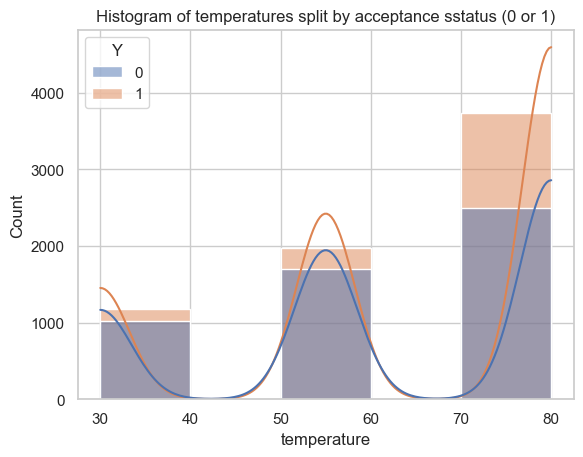

In [18]:
#Explore whether temperature has a influence on acceptance. 
ax = sns.histplot(data, x="temperature", kde=True, binwidth = 10, hue="Y")
plt.title ("Histogram of temperatures split by acceptance sstatus (0 or 1)")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


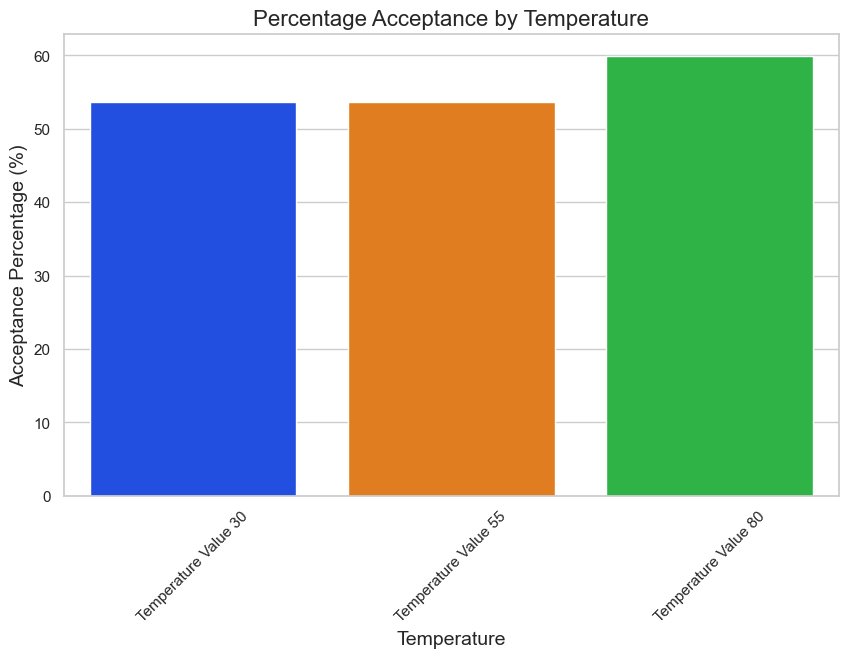

In [88]:
# Calculate the acceptance percentage within each category of temperature
acceptance_percentage_by_temperature = (data.groupby("temperature")["Y"].sum() / data.groupby("temperature")["Y"].count()) * 100

# Sort the data by temperature for plotting
sorted_data = data.sort_values("temperature")

# Create a list of labels with the format "Temperature Value x"
temperature_labels = ["Temperature Value {}".format(temp) for temp in sorted_data["temperature"].unique()]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=temperature_labels, y=acceptance_percentage_by_temperature.values, palette='bright')

# Set the title and labels
plt.title("Percentage Acceptance by Temperature", fontsize=16)
plt.xlabel("Temperature", fontsize=14)
plt.ylabel("Acceptance Percentage (%)", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

**Inference**
Temperature has no real impact on the coupon acceptance

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [89]:
#Unique values of 'coupon' column to see all the available choices
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

In [90]:
# filter bar coupon only
df_bar_coupons = data.query("coupon == 'Bar'")

In [91]:
df_bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


In [92]:
df_bar_coupons.shape

(1913, 25)

In [93]:
#The data in the filtered dataset
df_bar_coupons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null   obj

2. What proportion of bar coupons were accepted?


In [94]:
bar_coupon_accepted = df_bar_coupons['Y'].value_counts()[1]
total_bar_coupon_offered = df_bar_coupons['Y'].count()

# The proportion of bar coupon acceptance 
proportion_of_bar_coupon_acceptance = round((bar_coupon_accepted/total_bar_coupon_offered)*100,2)

proportion_of_bar_coupon_acceptance

41.19

In [95]:

bar_coupon_not_accepted = df_bar_coupons['Y'].value_counts()[0]
total_bar_coupon_offered = df_bar_coupons['Y'].count()

# The proportion of bar coupon acceptance 
proportion_of_bar_coupon_not_accepted = round((bar_coupon_not_accepted/total_bar_coupon_offered)*100,2)

proportion_of_bar_coupon_not_accepted

58.81

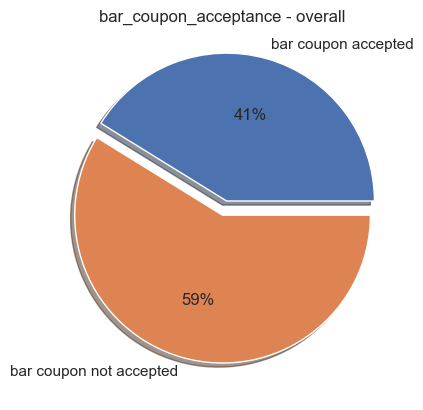

In [58]:
data = [proportion_of_bar_coupon_acceptance, proportion_of_bar_coupon_not_accepted]
labels = ['bar coupon accepted', 'bar coupon not accepted']
#create pie chart bar_coupon_acceptance - overall
plt.pie(data, explode=explode, labels = labels, shadow=True, autopct='%.0f%%')
plt.title('bar_coupon_acceptance - overall')
plt.show()

**Inference**
The proportion of bar coupons not accepted is higher (58.81%) compared to the proportion accepted (41.19%).

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [96]:
# Unique values for the Bar column
df_bar_coupons['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [97]:
more_frequent = ['gt8', '4~8']
df_bar_coupons['Bar_More_Frequent'] = np.where(df_bar_coupons['Bar'].isin(['gt8', '4~8']), 1, 0)
df_bar_coupons['Bar_More_Frequent'].value_counts()

# This column now simply says whether a person is a frequent visitor to the bar or not

/var/folders/d6/0v37p0dj7xv2m8x794bm_x7c0000gp/T/ipykernel_51286/3216670899.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar_coupons['Bar_More_Frequent'] = np.where(df_bar_coupons['Bar'].isin(['gt8', '4~8']), 1, 0)


Bar_More_Frequent
0    1720
1     193
Name: count, dtype: int64

In [98]:
# Lets first calculate the bar coupon accepted count for frequent visitors

bar_coupon_accepted_more_frequent_visitors = df_bar_coupons.query("Bar_More_Frequent == 1")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for frequent visitors

total_bar_coupon_offered_frequent_visitors = df_bar_coupons.query("Bar_More_Frequent == 1")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for frequent visitors

proportion_of_bar_coupon_acceptance_frequent_visitors = round((bar_coupon_accepted_more_frequent_visitors/total_bar_coupon_offered_frequent_visitors)*100,2)

proportion_of_bar_coupon_acceptance_frequent_visitors

76.17

In [100]:
# Lets first calculate the bar coupon accepted count for less frequent visitors

bar_coupon_accepted_less_frequent_visitors = df_bar_coupons.query("Bar_More_Frequent == 0")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for less frequent visitors

total_bar_coupon_offered_less_frequent_visitors = df_bar_coupons.query("Bar_More_Frequent == 0")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for less frequent visitors

proportion_of_bar_coupon_acceptance_less_frequent_visitors = round((bar_coupon_accepted_less_frequent_visitors/total_bar_coupon_offered_less_frequent_visitors)*100,2)

proportion_of_bar_coupon_acceptance_less_frequent_visitors

37.27

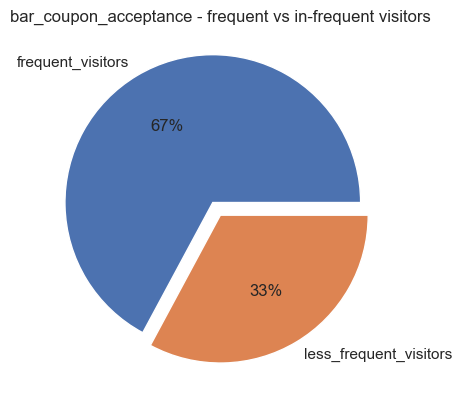

In [101]:
#define data
data = [proportion_of_bar_coupon_acceptance_frequent_visitors, proportion_of_bar_coupon_acceptance_less_frequent_visitors]
labels = ['frequent_visitors', 'less_frequent_visitors']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, explode=explode, autopct='%.0f%%')
plt.title('bar_coupon_acceptance - frequent vs in-frequent visitors')
plt.show()

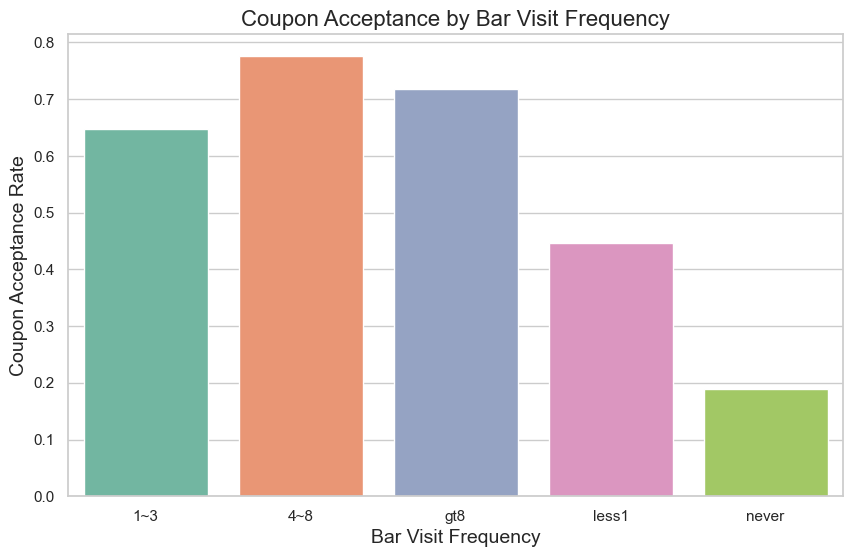

In [102]:

# Calculate the average coupon acceptance rate for each category of bar visit frequency
acceptance_by_bar_visit = df_bar_coupons.groupby('Bar')['Y'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=acceptance_by_bar_visit, x='Bar', y='Y', palette='Set2')

# Set the title and labels
plt.title('Coupon Acceptance by Bar Visit Frequency', fontsize=16)
plt.xlabel('Bar Visit Frequency', fontsize=14)
plt.ylabel('Coupon Acceptance Rate', fontsize=14)

plt.show()


In [ ]:
**Inference**
The number of visists have a positive correlation on the acceptance rate

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [103]:
# Let's find all the unique values for the Bar column

df_bar_coupons['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [104]:
# Let's create a function that checks for both the conditions and return 1 or 0

def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['46', '26', '31', '41', '50plus', '36']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above

df_bar_coupons['Bar_Frequent_Age'] = df_bar_coupons.apply(conditions, axis=1)

In [105]:
# Let's validate the outcome whether it works based on the conditions applied

df_bar_coupons[['Bar','age','Bar_Frequent_Age']].sample(10)

,Bar,age,Bar_Frequent_Age
9614,less1,21,0
1007,never,31,0
10744,less1,41,0
1580,less1,31,0
8525,1~3,21,0
12639,never,26,0
584,4~8,31,1
6770,less1,31,0
1734,never,26,0
8380,less1,50plus,0


In [106]:
# Lets first calculate the bar coupon accepted count for high frequent vistors with elderly age

bar_coupon_accepted_more_frequent_visitors_elder_age = df_bar_coupons.query("Bar_Frequent_Age == 1")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for frequent visitors with elderly age

total_bar_coupon_offered_frequent_visitors_elder_age = df_bar_coupons.query("Bar_Frequent_Age == 1")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for frequent visitors with elderly age

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age = round((bar_coupon_accepted_more_frequent_visitors_elder_age/total_bar_coupon_offered_frequent_visitors_elder_age)*100,2)

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age

68.98

In [107]:
# Lets first calculate the bar coupon accepted count for less frequent vistors with younger age

bar_coupon_accepted_less_frequent_visitors_younger_age = df_bar_coupons.query("Bar_Frequent_Age == 0")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for less frequent vistors with younger age

total_bar_coupon_offered_less_frequent_visitors_younger_age = df_bar_coupons.query("Bar_Frequent_Age == 0")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for less frequent vistors with younger age

proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age = round((bar_coupon_accepted_less_frequent_visitors_younger_age/total_bar_coupon_offered_less_frequent_visitors_younger_age)*100,2)

proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age

33.77

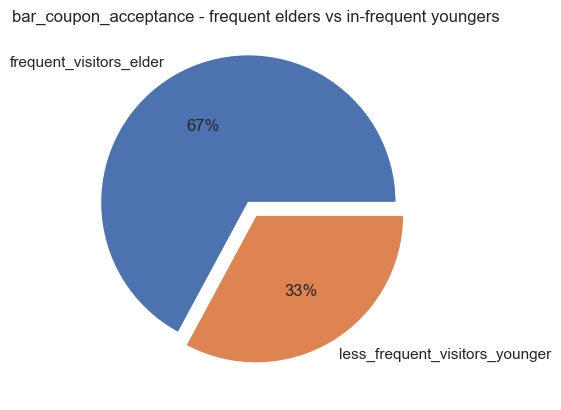

In [108]:
#define data
data = [proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age, proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age]
labels = ['frequent_visitors_elder', 'less_frequent_visitors_younger']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, explode = explode, autopct='%.0f%%')
plt.title('bar_coupon_acceptance - frequent elders vs in-frequent youngers')
plt.show()

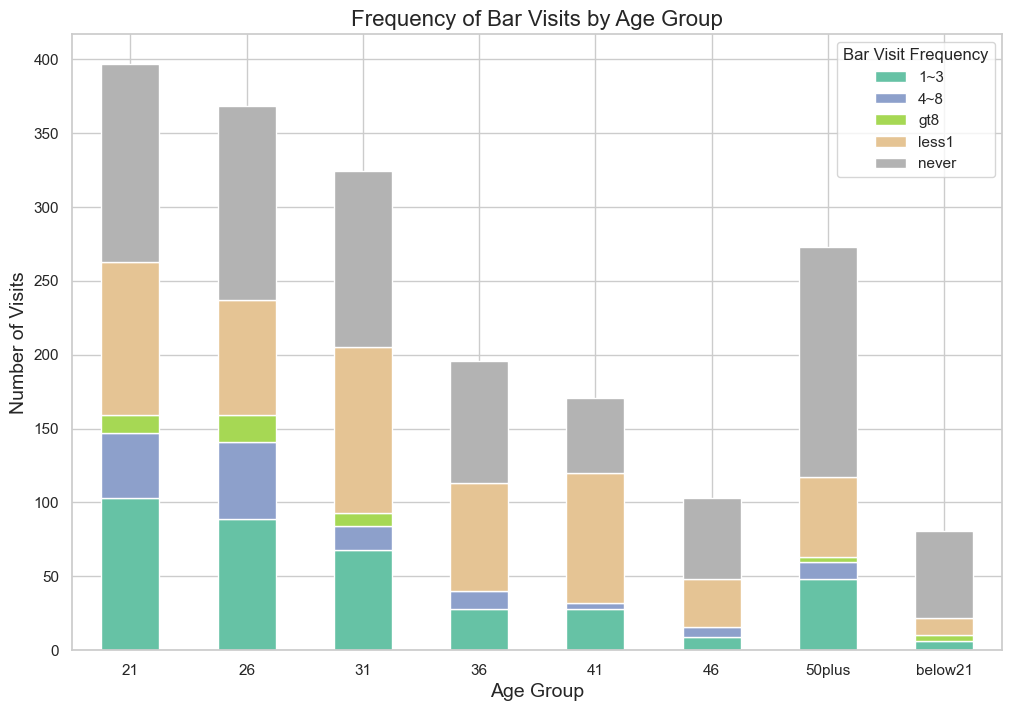

In [109]:
# Create a crosstab to get the count of each frequency category within each age group
age_frequency_crosstab = pd.crosstab(df_bar_coupons['age'], df_bar_coupons['Bar'])

# Plotting the data
age_frequency_crosstab.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set2')

# Set the title and labels
plt.title('Frequency of Bar Visits by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Visits', fontsize=14)
plt.xticks(rotation=360)
plt.legend(title='Bar Visit Frequency')
plt.show()

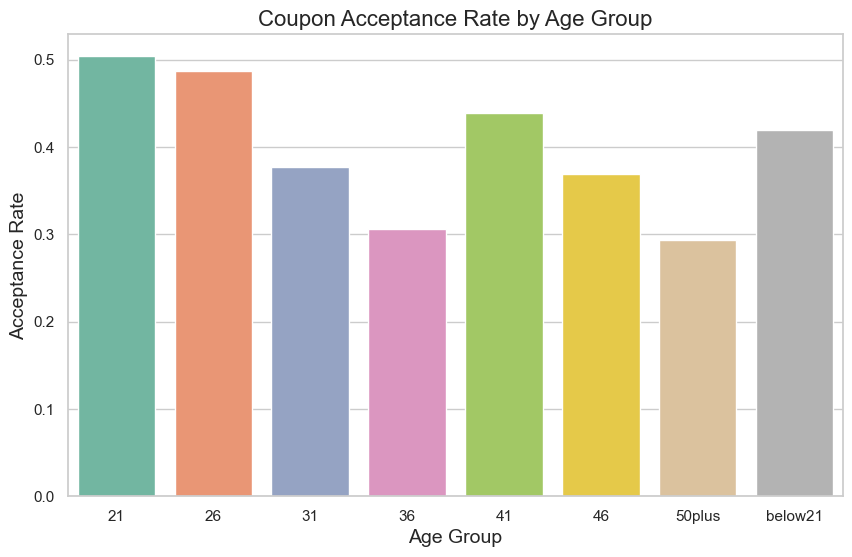

In [110]:
# Calculate the acceptance rate within each age group
acceptance_rate_by_age = df_bar_coupons.groupby('age')['Y'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=acceptance_rate_by_age, x='age', y='Y', palette='Set2')

# Set the title and labels
plt.title('Coupon Acceptance Rate by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Acceptance Rate', fontsize=14)

plt.show()

**Inference**
The age groups 21 and 26 exhibit a higher frequency of visiting the bar. Additionally, a higher frequency of bar visits is associated with an increased acceptance rate of coupons. This indicates that younger adults who visit the bar more frequently are also more likely to accept bar-related coupons.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [235]:
df_bar_coupons['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [236]:
df_bar_coupons['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [237]:
# Let's create a function that checks for all 3 conditions and return 1 or 0

def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['21','46', '26', '31', '41', '50plus', '36'] and s['occupation'] not in ['Farming Fishing & Forestry']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above

df_bar_coupons['Bar_Frequent_Age_Job'] = df_bar_coupons.apply(conditions, axis=1)

In [52]:
df_bar_coupons[['Bar','age','occupation','Bar_Frequent_Age_Job']].sample(10)

,Bar,age,occupation,Bar_Frequent_Age_Job
2178,4~8,21,Student,1
2680,less1,41,Transportation & Material Moving,0
4997,never,21,Unemployed,0
10760,less1,31,Computer & Mathematical,0
5795,4~8,31,Management,1
1189,1~3,26,Computer & Mathematical,1
4086,1~3,21,Student,1
10042,less1,26,Community & Social Services,0
2371,4~8,21,Management,1
9501,less1,36,Computer & Mathematical,0


In [241]:
# Lets first calculate the bar coupon accepted count for high frequent vistors with elderly age and not farming/fishing job

bar_coupon_accepted_more_frequent_visitors_elder_age_job = df_bar_coupons.query("Bar_Frequent_Age_Job == 1")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for frequent visitors with elderly age and not farming/fishing job

total_bar_coupon_offered_frequent_visitors_elder_age_job = df_bar_coupons.query("Bar_Frequent_Age_Job == 1")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for frequent visitors with elderly age and not farming/fishing job

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_job = round((bar_coupon_accepted_more_frequent_visitors_elder_age_job/total_bar_coupon_offered_frequent_visitors_elder_age_job)*100,2)

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_job

69.04

In [242]:
# Lets first calculate the bar coupon accepted count for less frequent vistors with younger age and specific job

bar_coupon_accepted_less_frequent_visitors_younger_age_job = df_bar_coupons.query("Bar_Frequent_Age_Job == 0")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for less frequent vistors with younger age and specific job

total_bar_coupon_offered_less_frequent_visitors_younger_age_job = df_bar_coupons.query("Bar_Frequent_Age_Job == 0")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for less frequent vistors with younger age and specific job

proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age_job = round((bar_coupon_accepted_less_frequent_visitors_younger_age_job/total_bar_coupon_offered_less_frequent_visitors_younger_age_job)*100,2)

proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age_job

29.61

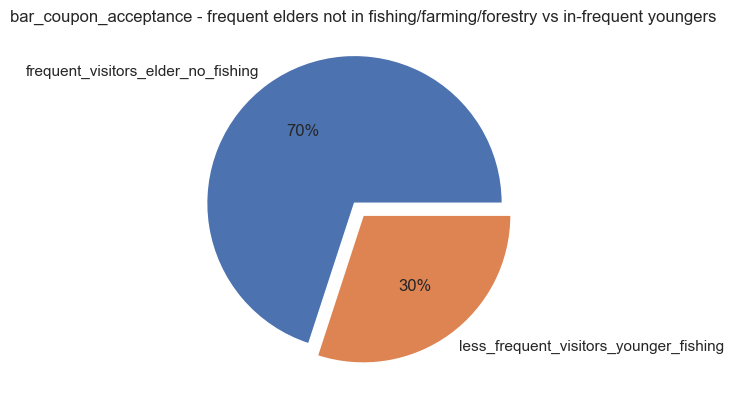

In [243]:
#define data
data = [proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_job, proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age_job]
labels = ['frequent_visitors_elder_no_fishing', 'less_frequent_visitors_younger_fishing']
#create pie chart
plt.pie(data, labels = labels, explode = explode, autopct='%.0f%%')
plt.title('bar_coupon_acceptance - frequent elders not in fishing/farming/forestry vs in-frequent youngers')
plt.show()

**Inference**
From above, we can find the 'frequent elderly visitors without farming/fishing/forestry job' to bar have accepted the coupons to the most (70%) compared to 'less frequent young visitors with farming/fishing/forestry job' who have showed only less interest (30%)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [60]:
df_bar_coupons['maritalStatus'].unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

In [61]:
# Let's create a function that checks for all first 3 conditions and return 1 or 0

def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['21','46', '26', '31', '41', '50plus', '36'] and s['maritalStatus'] not in ['Widowed']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above

df_bar_coupons['Bar_Frequent_Age_Marital'] = df_bar_coupons.apply(conditions, axis=1)

In [62]:
# Let's validate the outcome whether it works based on the conditions applied

df_bar_coupons[['Bar','age','maritalStatus','Bar_Frequent_Age_Marital']].sample(10)

,Bar,age,maritalStatus,Bar_Frequent_Age_Marital
7241,1~3,50plus,Married partner,1
1712,never,26,Married partner,0
2736,never,36,Single,0
6863,never,46,Married partner,0
3263,never,21,Married partner,0
4030,1~3,31,Married partner,1
4187,less1,26,Single,0
1430,less1,36,Married partner,0
10267,never,31,Married partner,0
8197,1~3,31,Single,1


In [63]:
# Lets first calculate the bar coupon accepted count for high frequent vistors with elderly age and not widowed

bar_coupon_accepted_more_frequent_visitors_elder_age_not_widowed = df_bar_coupons.query("Bar_Frequent_Age_Marital == 1")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for frequent visitors with elderly age and not widowed

total_bar_coupon_offered_frequent_visitors_elder_age_not_widowed = df_bar_coupons.query("Bar_Frequent_Age_Marital == 1")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for frequent visitors with elderly age and not widowed

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_not_widowed = round((bar_coupon_accepted_more_frequent_visitors_elder_age_not_widowed/total_bar_coupon_offered_frequent_visitors_elder_age_not_widowed)*100,2)

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_not_widowed

69.04

In [65]:
# Let's create a function that checks for all second 2 conditions and return 1 or 0

def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['below21', '21', '26']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above

df_bar_coupons['Bar_Frequent_Age_30'] = df_bar_coupons.apply(conditions, axis=1)

In [66]:
# Let's validate the outcome whether it works based on the conditions applied

df_bar_coupons[['Bar','age','Bar_Frequent_Age_30']].sample(10)

,Bar,age,Bar_Frequent_Age_30
1014,1~3,50plus,0
9132,less1,21,0
7986,less1,36,0
10905,1~3,21,1
7313,gt8,26,1
7637,never,50plus,0
4422,less1,36,0
7884,1~3,26,1
4136,never,26,0
11103,never,21,0


In [67]:
# Lets first calculate the bar coupon accepted count for high frequent vistors with younger age

bar_coupon_accepted_more_frequent_visitors_younger_age = df_bar_coupons.query("Bar_Frequent_Age_30 == 1")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for frequent visitors with younger age

total_bar_coupon_offered_frequent_visitors_younger_age = df_bar_coupons.query("Bar_Frequent_Age_30 == 1")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for frequent visitors with younger age

proportion_of_bar_coupon_acceptance_frequent_visitors_younger_age = round((bar_coupon_accepted_more_frequent_visitors_younger_age/total_bar_coupon_offered_frequent_visitors_younger_age)*100,2)

proportion_of_bar_coupon_acceptance_frequent_visitors_younger_age

71.95

In [68]:
df_bar_coupons['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [69]:
df_bar_coupons['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [70]:
# Let's create a function that checks for all second 2 conditions and return 1 or 0

def conditions(s):
    if s['RestaurantLessThan20'] in ['4~8', 'gt8'] and s['income'] in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above

df_bar_coupons['Bar_cheap_restaurant_low_income'] = df_bar_coupons.apply(conditions, axis=1)

In [71]:
# Let's validate the outcome whether it works based on the conditions applied

df_bar_coupons[['RestaurantLessThan20','income','Bar_cheap_restaurant_low_income']].sample(10)

,RestaurantLessThan20,income,Bar_cheap_restaurant_low_income
7219,less1,$25000 - $37499,0
3065,gt8,$75000 - $87499,0
11276,4~8,$50000 - $62499,0
3245,1~3,$25000 - $37499,0
11070,less1,Less than $12500,0
11571,less1,$25000 - $37499,0
10162,1~3,$75000 - $87499,0
2360,1~3,$25000 - $37499,0
2973,less1,$37500 - $49999,0
1562,1~3,$100000 or More,0


In [72]:
# Lets first calculate the bar coupon accepted count for cheap restaurant visitor with low income

bar_coupon_accepted_cheap_restaurant_low_income = df_bar_coupons.query("Bar_cheap_restaurant_low_income == 1")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for cheap restaurant visitor with low income

total_bar_coupon_offered_cheap_restaurant_low_income = df_bar_coupons.query("Bar_cheap_restaurant_low_income == 1")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for cheap restaurant visitor with low income

proportion_of_bar_coupon_acceptance_cheap_restaurant_low_income = round((bar_coupon_accepted_cheap_restaurant_low_income/total_bar_coupon_offered_cheap_restaurant_low_income)*100,2)

proportion_of_bar_coupon_acceptance_cheap_restaurant_low_income

45.65

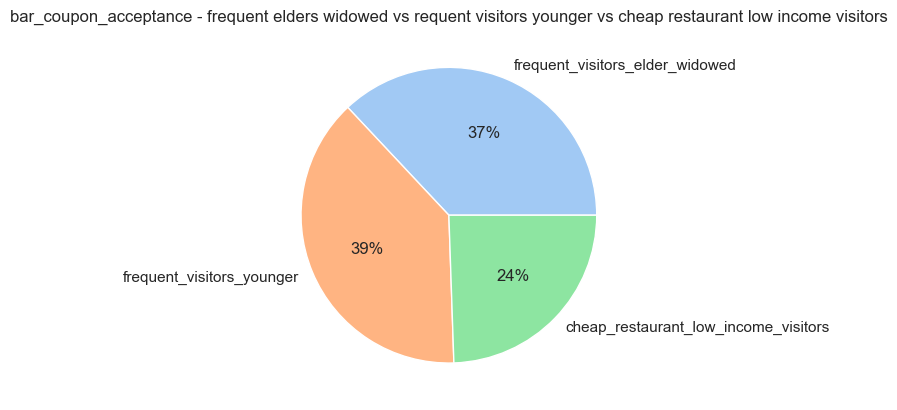

In [116]:
pieData = [proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_not_widowed, proportion_of_bar_coupon_acceptance_frequent_visitors_younger_age, proportion_of_bar_coupon_acceptance_cheap_restaurant_low_income]
labels = ['frequent_visitors_elder_widowed', 'frequent_visitors_younger', 'cheap_restaurant_low_income_visitors']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:3]

#create pie chart
plt.pie(pieData, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('bar_coupon_acceptance - frequent elders widowed vs requent visitors younger vs cheap restaurant low income visitors')
plt.show()

**Inference**

From above, we can find the 'frequent younger visitors' to bar have accepted the coupons to the most (39%) compared to 'frequent visitors that are elder and widowed' who have slightly less interest (37%) or 'frequent visitors to cheap restaurants with low income' who have even less interest (24%)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Inference**
1. The most frequent visitors to bars, constituting 76%, demonstrate the highest acceptance rates for coupons, indicating a strong engagement with promotional offers.

2. Elderly patrons who are frequent bar visitors show a notably high acceptance rate of 69%, contrasting sharply with less frequent young visitors, who exhibit a substantially lower interest level of 33%.

3. Among frequent elderly visitors without farming, fishing, or forestry jobs, a significant 70% acceptance rate for coupons is observed, while their less frequent young counterparts with such occupations display a markedly lower interest level of 30%.

4. Frequent younger visitors to bars exhibit a relatively high acceptance rate of 39%, whereas frequent visitors who are elderly and widowed, with a slightly lower interest of 37%, or those frequenting cheap restaurants with low incomes, with an even lower interest of 24%, demonstrate varying levels of coupon acceptance.

5. Overall, the data suggests that frequent bar visitors are more likely to take advantage of coupons, while individuals within low-income brackets or those who patronize inexpensive eateries show less interest in bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [11]:
#Reset data

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = pd.read_csv('data/coupons.csv')

data.head()

data.shape[0]

# That data does not make much sense hence drop the column 
data.drop(columns=['car'], inplace=True)

# Drop null values 
data = data.dropna()

In [12]:
df_coffee_coupons = data.query("coupon == 'Coffee House'")
df_coffee_coupons.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [13]:
# Let's find the number of rows and columns available

df_coffee_coupons.shape

(3816, 25)

In [14]:
# Lets first calculate the coffee house coupon accepted count

coffee_coupon_accepted = df_coffee_coupons['Y'].value_counts()[1]

# Lets calculate the total coffee house coupon offered count

total_coffee_coupon_offered = df_coffee_coupons['Y'].count()

# Lets calculate the proportion of coffee coupon acceptance from above values

proportion_of_coffee_coupon_acceptance = round((coffee_coupon_accepted/total_coffee_coupon_offered)*100,2)

proportion_of_coffee_coupon_acceptance

49.63

In [207]:
# Let's check the column data types once

df_coffee_coupons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3816 entries, 23 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3816 non-null   object
 1   passanger             3816 non-null   object
 2   weather               3816 non-null   object
 3   temperature           3816 non-null   int64 
 4   time                  3816 non-null   object
 5   coupon                3816 non-null   object
 6   expiration            3816 non-null   object
 7   gender                3816 non-null   object
 8   age                   3816 non-null   object
 9   maritalStatus         3816 non-null   object
 10  has_children          3816 non-null   int64 
 11  education             3816 non-null   object
 12  occupation            3816 non-null   object
 13  income                3816 non-null   object
 14  Bar                   3816 non-null   object
 15  CoffeeHouse           3816 non-null   obj

In [15]:
# Let's validate if the column has been created with appropriate data type

print(df_coffee_coupons.dtypes)

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [16]:
# Validate if the replaced values are showing up
# Let's make a copy of the numeric column for acceptance and then convert into string for better use in charts

df_coffee_coupons['acceptance'] = df_coffee_coupons['Y']

df_coffee_coupons['acceptance']=df_coffee_coupons['acceptance'].astype("string")
df_coffee_coupons['acceptance'] = df_coffee_coupons['acceptance'].str.replace('1', 'Accepted')
df_coffee_coupons['acceptance'] = df_coffee_coupons['acceptance'].str.replace('0', 'Not Accepted')
df_coffee_coupons['acceptance'].unique()

/var/folders/d6/0v37p0dj7xv2m8x794bm_x7c0000gp/T/ipykernel_35723/1296427325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee_coupons['acceptance'] = df_coffee_coupons['Y']
/var/folders/d6/0v37p0dj7xv2m8x794bm_x7c0000gp/T/ipykernel_35723/1296427325.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee_coupons['acceptance']=df_coffee_coupons['acceptance'].astype("string")
/var/folders/d6/0v37p0dj7xv2m8x794bm_x7c0000gp/T/ipykernel_35723/1296427325.py:7: SettingWithCopyWarning: 
A value is 

<StringArray>
['Not Accepted', 'Accepted']
Length: 2, dtype: string

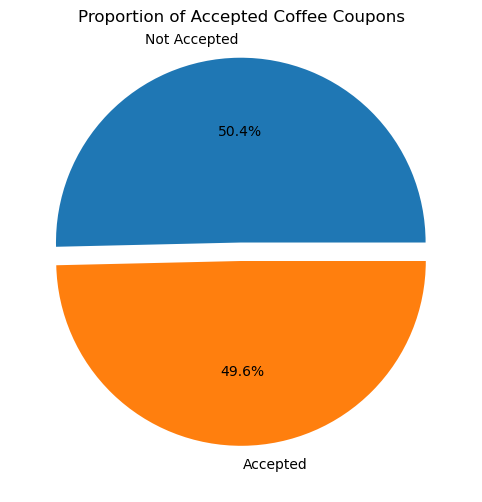

In [19]:
import matplotlib.pyplot as plt

# Define explode
explode = (0.1, 0)  # Explode the first slice

acceptance_counts = df_coffee_coupons['acceptance'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(acceptance_counts, labels=acceptance_counts.index, autopct='%1.1f%%', explode=explode)
plt.title('Proportion of Accepted Coffee Coupons')
plt.show()

In [254]:
df_coffee_coupons['passanger'].unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [265]:
#To save the fif in images folder
pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 MB 10.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


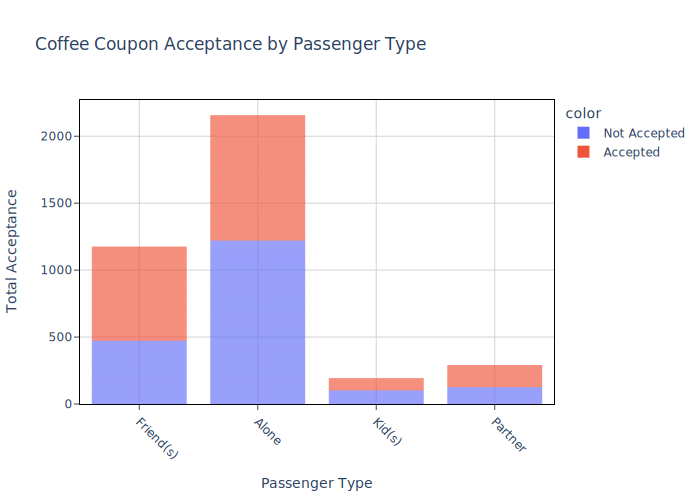

In [28]:
import plotly.express as px

fig = px.bar(df_coffee_coupons['passanger'], 
             color=df_coffee_coupons['acceptance'], 
             title='Coffee Coupon Acceptance by Passenger Type',
             labels={'value': 'Passenger Type', 'count': 'Total Acceptance'}
            )

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    tickangle=45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

fig.update_traces(marker_line_width=0)

fig.update_layout(bargap=0.2, bargroupgap=0)

# Show the figure
fig.show("svg")

In [256]:
# Calculate acceptance percentage by age
acceptance_counts = df_coffee_coupons.groupby(['passanger', 'Y']).size().unstack(fill_value=0)
total_counts = df_coffee_coupons.groupby('passanger').size()
acceptance_df = (acceptance_counts[1] / total_counts * 100).reset_index(name='Acceptance Percentage')

# Print acceptance percentages
print("Acceptance Percentage by Passanger Type:")
print(acceptance_df.to_string(index=False))

Acceptance Percentage by Passanger Type:
passanger  Acceptance Percentage
    Alone              43.393602
Friend(s)              59.744681
   Kid(s)              47.150259
  Partner              56.701031


**Inference**

Passengers accompanied by friends showed a notably higher acceptance rate for coffee coupons compared to those traveling alone, suggesting a correlation between social company and coupon acceptance behavior.

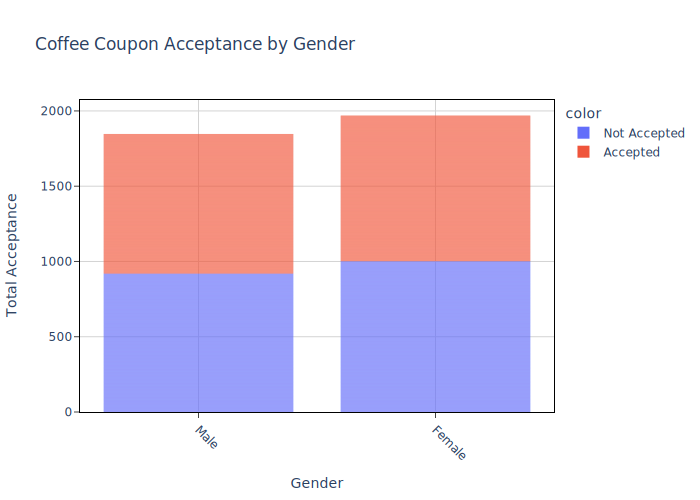

In [27]:
fig = px.bar(df_coffee_coupons['gender'], color=df_coffee_coupons['acceptance'], 
             title = 'Coffee Coupon Acceptance by Gender',
            labels={'value':'Gender',
                   'count':'Total Acceptance'}
            )

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    tickangle = 45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

fig.update_traces(marker_line_width = 0,
                  selector=dict(type="bar"))

fig.update_layout(bargap=0.2,
                  bargroupgap = 0,
                 )

# Show the figure
fig.show("svg")

In [258]:
# Calculate acceptance percentage by age
acceptance_counts = df_coffee_coupons.groupby(['gender', 'Y']).size().unstack(fill_value=0)
total_counts = df_coffee_coupons.groupby('gender').size()
acceptance_df = (acceptance_counts[1] / total_counts * 100).reset_index(name='Acceptance Percentage')

# Print acceptance percentages
print("Acceptance Percentage by Gender Type:")
print(acceptance_df.to_string(index=False))

Acceptance Percentage by Gender Type:
gender  Acceptance Percentage
Female              49.111224
  Male              50.189496


**Inference**
Slight difference between the genders, Males have slightly more accepetance

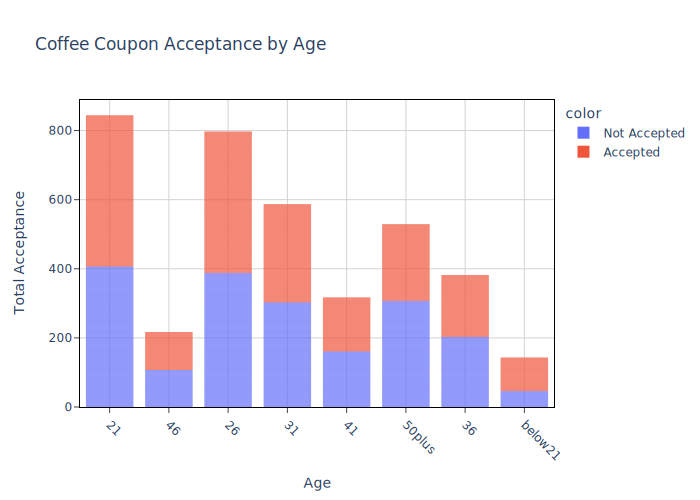

In [26]:
fig = px.bar(df_coffee_coupons['age'], color=df_coffee_coupons['acceptance'], 
             title = 'Coffee Coupon Acceptance by Age',
            labels={'value':'Age',
                   'count':'Total Acceptance'}
            )

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    tickangle = 45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

fig.update_traces(marker_line_width = 0,
                  selector=dict(type="bar"))

fig.update_layout(bargap=0.2,
                  bargroupgap = 0,
                 )

# Show the figure
fig.show("svg")

In [259]:
# Calculate acceptance percentage by age
acceptance_counts = df_coffee_coupons.groupby(['age', 'Y']).size().unstack(fill_value=0)
total_counts = df_coffee_coupons.groupby('age').size()
acceptance_df = (acceptance_counts[1] / total_counts * 100).reset_index(name='Acceptance Percentage')

# Print acceptance percentages
print("Acceptance Percentage by Age:")
print(acceptance_df.to_string(index=False))

Acceptance Percentage by Age:
    age  Acceptance Percentage
     21              51.777251
     26              51.317440
     31              48.381601
     36              46.858639
     41              49.211356
     46              50.691244
 50plus              41.965974
below21              67.832168


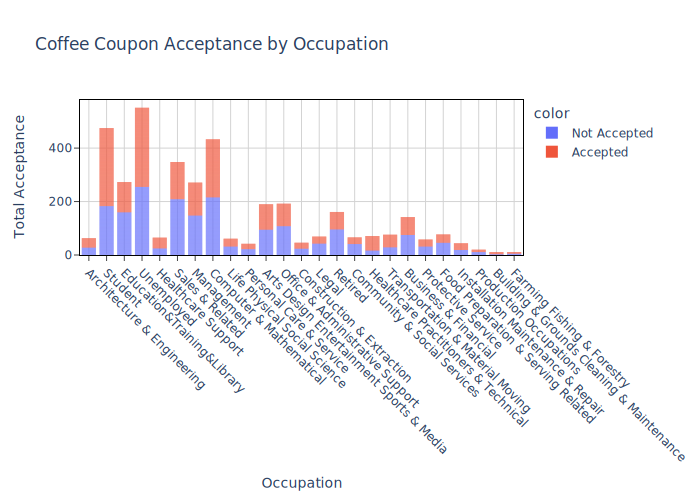

In [25]:
# Lets create a barplot based on the coffee coupon acceptance, by occupation 

fig = px.bar(df_coffee_coupons['occupation'], color=df_coffee_coupons['acceptance'], 
             title = 'Coffee Coupon Acceptance by Occupation',
            labels={'value':'Occupation',
                   'count':'Total Acceptance'}
            )

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    tickangle = 45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

fig.update_traces(marker_line_width = 0,
                  selector=dict(type="bar"))

fig.update_layout(bargap=0.2,
                  bargroupgap = 0,
                 )

# Show the figure
fig.show("svg")

In [227]:
df_coffee_coupons = pd.DataFrame(data)

# Calculate acceptance percentage by occupation
acceptance_counts = df_coffee_coupons.groupby(['occupation', 'Y']).size().unstack(fill_value=0)
total_counts = df_coffee_coupons.groupby('occupation').size()
acceptance_df = (acceptance_counts[1] / total_counts * 100).reset_index(name='Acceptance Percentage')

# Print acceptance percentages
print("Acceptance Percentage by Occupation:")
print(acceptance_df.to_string(index=False))

Acceptance Percentage by Occupation:
                               occupation  Acceptance Percentage
               Architecture & Engineering              63.428571
 Arts Design Entertainment Sports & Media              53.368794
Building & Grounds Cleaning & Maintenance              59.090909
                     Business & Financial              56.976744
              Community & Social Services              49.771689
                  Computer & Mathematical              56.359649
                Construction & Extraction              68.831169
               Education&Training&Library              51.345029
               Farming Fishing & Forestry              53.488372
       Food Preparation & Serving Related              56.521739
     Healthcare Practitioners & Technical              71.621622
                       Healthcare Support              69.834711
        Installation Maintenance & Repair              53.383459
                                    Legal            

***Inference***
Coffee Coupon acceptance 

1. **Gender**: Males exhibit a slightly higher acceptance percentage (59.23%) compared to females (54.75%), suggesting a potential gender-based preference or behavior towards coffee coupons.

2. **Passenger Type**: Individuals traveling with friends show the highest acceptance rate (67.63%), while those traveling alone exhibit a lower rate (52.70%), indicating the influence of social context on coupon acceptance.

3. **Age**: Acceptance percentages vary across age groups, with individuals below 21 years old demonstrating the highest acceptance (63.29%). Older age groups, particularly 50 plus, display comparatively lower acceptance rates (50.75%), indicating a potential generational difference in coupon behavior.

4. **Occupation**: Healthcare practitioners & technical professionals exhibit the highest acceptance rate (71.62%), whereas retirees show the lowest rate (45.67%). This suggests that occupation may play a significant role in determining coupon acceptance behavior, potentially influenced by factors such as income level or lifestyle preferences.


**Conclusion**

**Passenger Type** has influence. Occupation may seem like it has influence, but the data size is small. Gender and Age does NOT have a significant impact on the overall distribution. 